In [22]:
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [23]:
class convertor():

    def eucalizationHistogram(self,image):
        L=256
        X=range(L)
        draw = ImageDraw.Draw(image) 
        width = image.size[0] 
        height = image.size[1] 
        pix = image.load() 

        histogram=[0]*L
        #насчитываем гистограмму
        for x in range(width):
            for y in range(height):#так как изображение в оттенках серого, то значения каналов равны
                histogram[pix[x, y][0]]+=1
        histogram_p=[0]*L#частота появления пикселей с яркостью i
        for i in range(L):
            histogram_p[i]=histogram[i]/width/height
        

        #fig, ax = plt.subplots()
        #ax.bar(X,histogram_p)

        s=[0]*L#новая яркость
        for k in range(L):
            for j in range(k+1):
                s[k]+=histogram_p[j];
            s[k]=round((L-1)*s[k]);
        s_set=set(s)
        histogram_p_new=[0]*L#новая частота
        for i in s_set:
            for j in range(L):
                if (s[j]==i):
                    histogram_p_new[i]+=histogram_p[j]

        #fig, ax = plt.subplots()
        #ax.bar(X,histogram_p_new)
        return s, histogram_p, width, height
    def convertingHistogram(self, inputIm, shouldGet,name_in, name_sh):
        L=256
        X=range(L)
        s=[0]*L
        histogram_p_input=[0]*L
        [s, histogram_p_input,w_input, h_input]=self.eucalizationHistogram(inputIm)
        
       # print(s)
        
        g=[0]*L
        histogram_p_should=[0]*L
        [g, histogram_p_should,w_should, h_should]=self.eucalizationHistogram(shouldGet)
        
      #  print(g)
        
        #отображение из s в z
        start_i=0
        #while(s[start_i]==0 and start_i<L):
        #    start_i+=1
        start_z=0
        #while(g[start_z]==0 and start_z<L):
        #    start_z+=1
        #for i in range(start_i,L):
        #    print(s[i])
        #for i in range(start_z,L):
       #     print(g[i])
        for i in range(start_i,L):
            minDiff=s[i]
            z=start_z
            min_z=start_z
            diff=abs(s[i]-g[z])
            while(minDiff>=diff and z<L-1):
                while(minDiff>diff and z<L-1):
                    min_z=z
                    minDiff=diff
                    z+=1
                    diff=abs(s[i]-g[z])

                while(minDiff==diff and z<L-1):
                    z+=1
                    diff=abs(s[i]-g[z])

            if(minDiff>diff):
                    min_z=z
                    minDiff=diff
            s[i]=min_z
        pix = inputIm.load() 
        s_set=set(s)
        histogram_p_new=[0]*L#новая частота
        for i in s_set:
            for j in range(L):
                if (s[j]==i):
                    histogram_p_new[i]+=histogram_p_input[j]
        fig, ax = plt.subplots()
        ax.bar(X,histogram_p_input)
        count_lvl=0
        for i in range(L):
            if (histogram_p_input[i]>0):
                count_lvl+=1
        print('Number of brightless level = ',count_lvl)
        fig, ax = plt.subplots()
        ax.bar(X,histogram_p_should)
        count_lvl=0
        for i in range(L):
            if (histogram_p_should[i]>0):
                count_lvl+=1
        print('Number of brightless level = ',count_lvl)
        fig, ax = plt.subplots()
        ax.bar(X,histogram_p_new)
        count_lvl=0
        for i in range(L):
            if (histogram_p_new[i]>0):
                count_lvl+=1
        print('Number of brightless level = ',count_lvl)
        #преобразование изображения
        draw = ImageDraw.Draw(inputIm) 
        # for i in range(L):
        for x in range(w_input):
            for y in range(h_input):
                #if(pix[x, y][0]==i):
                draw.point((x, y), (s[pix[x, y][0]], s[pix[x, y][0]], s[pix[x, y][0]]))
        file=name_in+name_sh+"result.jpg"
        inputIm.save(file, "JPEG")

0 - the end of program
Name of input image:7
0 - the end of program
Name of shouldGet image:1
Number of brightless level =  223
Number of brightless level =  256
Number of brightless level =  129
0 - the end of program
Name of input image:7
0 - the end of program
Name of shouldGet image:3
Number of brightless level =  223
Number of brightless level =  246
Number of brightless level =  135
0 - the end of program
Name of input image:7
0 - the end of program
Name of shouldGet image:4
Number of brightless level =  223
Number of brightless level =  252
Number of brightless level =  87
0 - the end of program
Name of input image:7
0 - the end of program
Name of shouldGet image:5
Number of brightless level =  223
Number of brightless level =  249
Number of brightless level =  117
0 - the end of program
Name of input image:7
0 - the end of program
Name of shouldGet image:6
Number of brightless level =  223
Number of brightless level =  215
Number of brightless level =  88
0 - the end of program

<ipython-input-23-947fc5796d0c>:106: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


0 - the end of program
Name of input image:0


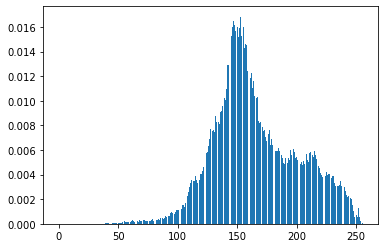

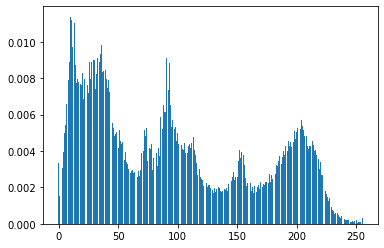

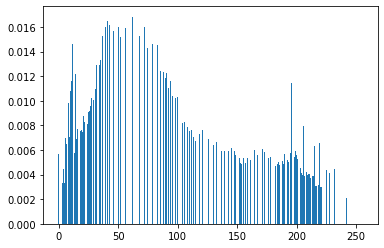

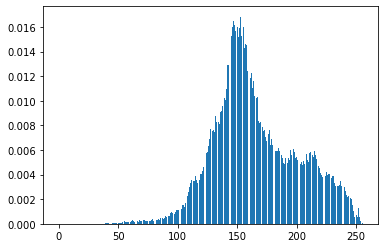

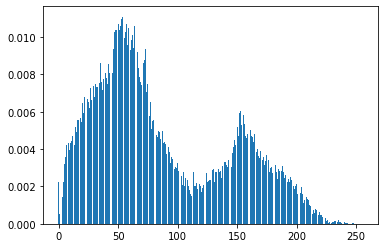

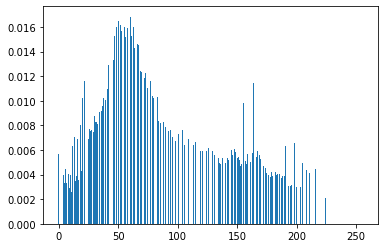

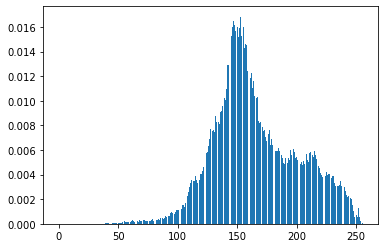

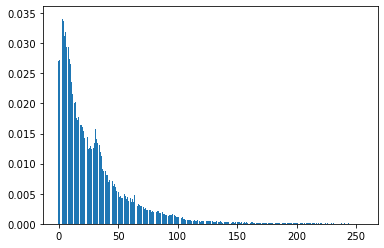

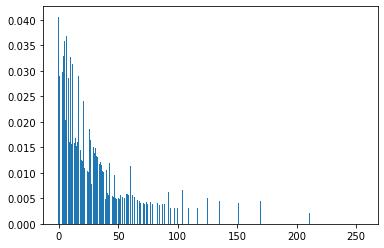

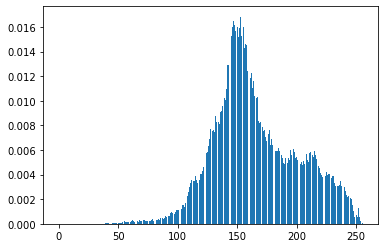

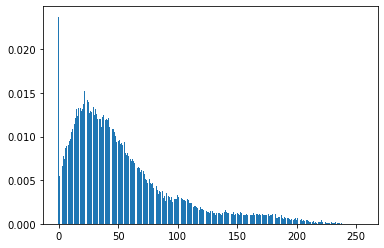

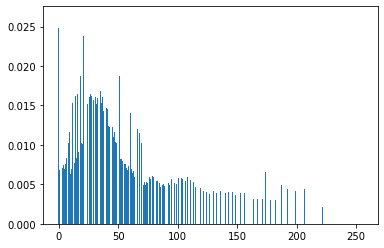

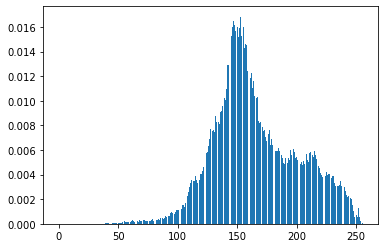

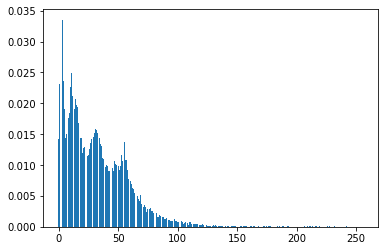

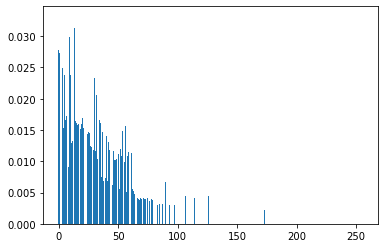

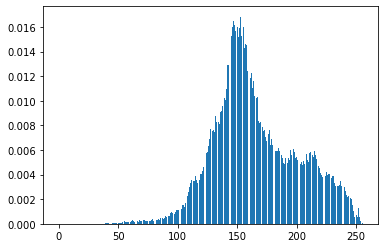

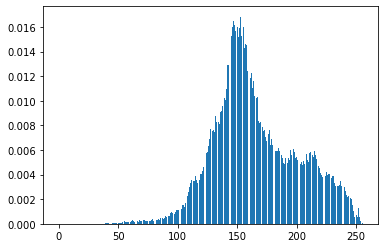

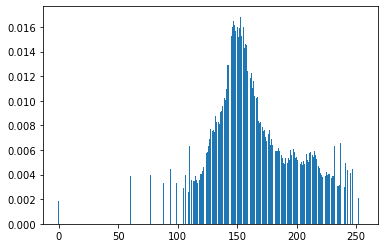

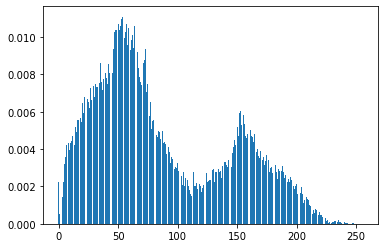

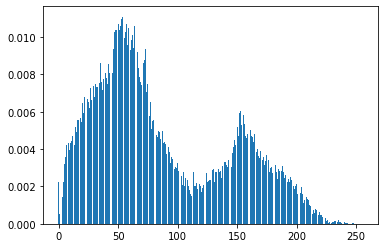

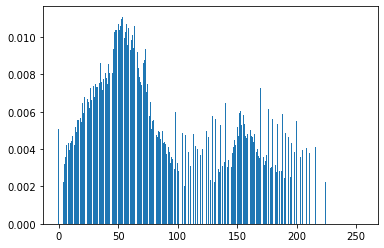

In [33]:
obj=convertor()
name_in = input('0 - the end of program\nName of input image:')
while(name_in!="0"):
    file=name_in+".jpg"
    inputIm = Image.open(file)
   
    name_sh = input('0 - the end of program\nName of shouldGet image:')
    file=name_sh+".jpg"
    shouldGet = Image.open(file)
    obj.convertingHistogram(inputIm, shouldGet, name_in, name_sh)
    name_in = input('0 - the end of program\nName of input image:')

###### light